In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from statsmodels.tsa.seasonal import seasonal_decompose


In [137]:
import warnings
warnings.filterwarnings("ignore")

In [138]:
df=pd.read_csv("GOOG.csv")

df['Date'] = pd.to_datetime(df['Date'])


# Understanding the data

In [140]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...,...
4853,2023-11-29,138.985001,139.669998,136.294998,136.399994,136.399994,21014700
4854,2023-11-30,136.399994,136.960007,132.789993,133.919998,133.919998,29913500
4855,2023-12-01,133.320007,133.500000,132.151993,133.320007,133.320007,24258400
4856,2023-12-04,131.294006,131.449997,129.399994,130.630005,130.630005,24117100


In [141]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [142]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4853,2023-11-29,138.985001,139.669998,136.294998,136.399994,136.399994,21014700
4854,2023-11-30,136.399994,136.960007,132.789993,133.919998,133.919998,29913500
4855,2023-12-01,133.320007,133.500000,132.151993,133.320007,133.320007,24258400
4856,2023-12-04,131.294006,131.449997,129.399994,130.630005,130.630005,24117100
4857,2023-12-05,130.369995,133.539993,129.729996,132.389999,132.389999,19216500


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4858 entries, 0 to 4857
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4858 non-null   datetime64[ns]
 1   Open       4858 non-null   float64       
 2   High       4858 non-null   float64       
 3   Low        4858 non-null   float64       
 4   Close      4858 non-null   float64       
 5   Adj Close  4858 non-null   float64       
 6   Volume     4858 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 265.8 KB


In [146]:
df.isnull().sum()


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [147]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,4858,4858.000000,4858.000000,4858.000000,4858.000000,4858.000000,4.858000e+03
mean,2014-04-12 02:30:17.044051200,41.477174,41.917059,41.055491,41.494404,41.494404,1.189152e+08
min,2004-08-19 00:00:00,2.470490,2.534002,2.390042,2.490913,2.490913,1.584340e+05
25%,2009-06-16 06:00:00,12.846597,12.954195,12.712414,12.834642,12.834642,2.854912e+07
50%,2014-04-12 12:00:00,26.499958,26.728268,26.289323,26.537501,26.537501,6.168836e+07
75%,2019-02-07 18:00:00,57.367250,58.028500,56.962251,57.611249,57.611249,1.467329e+08
max,2023-12-05 00:00:00,151.863495,152.100006,149.887497,150.709000,150.709000,1.650833e+09
std,NaN,38.590695,39.031758,38.193016,38.618107,38.618107,1.512424e+08


# Understanding the Descriptive Statistics

In [149]:
data = df.copy()

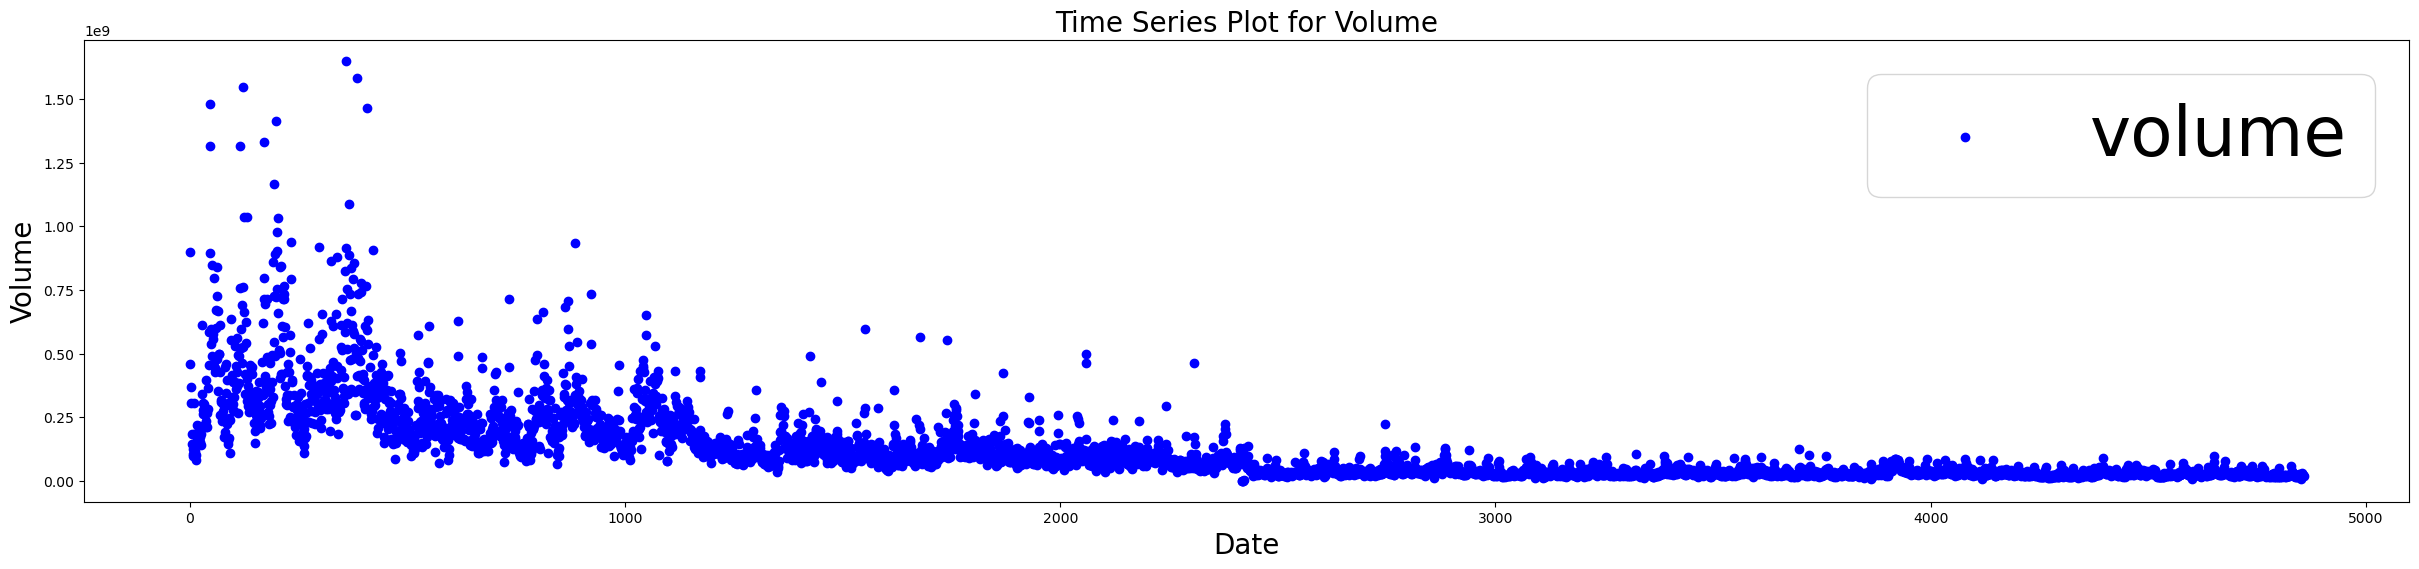

In [150]:
plt.figure(figsize=(30, 6))
plt.scatter(data.index, data['Volume'], marker='o', linestyle='-', color='b', label='volume')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Volume', fontsize=20)
plt.title('Time Series Plot for Volume', fontsize=20)
plt.legend(fontsize=50)

plt.show()


In [151]:
data['mean_of_prices'] = data[['Open', 'High', 'Low', 'Close', 'Adj Close']].mean(axis=1)
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume,mean_of_prices
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216,2.494151
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,2.626207
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,2.750092
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,2.670739
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,2.634326


In [152]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,mean_of_prices
4853,2023-11-29,138.985001,139.669998,136.294998,136.399994,136.399994,21014700,137.549997
4854,2023-11-30,136.399994,136.960007,132.789993,133.919998,133.919998,29913500,134.797998
4855,2023-12-01,133.320007,133.500000,132.151993,133.320007,133.320007,24258400,133.122403
4856,2023-12-04,131.294006,131.449997,129.399994,130.630005,130.630005,24117100,130.680801
4857,2023-12-05,130.369995,133.539993,129.729996,132.389999,132.389999,19216500,131.683996


# 1)lineplots

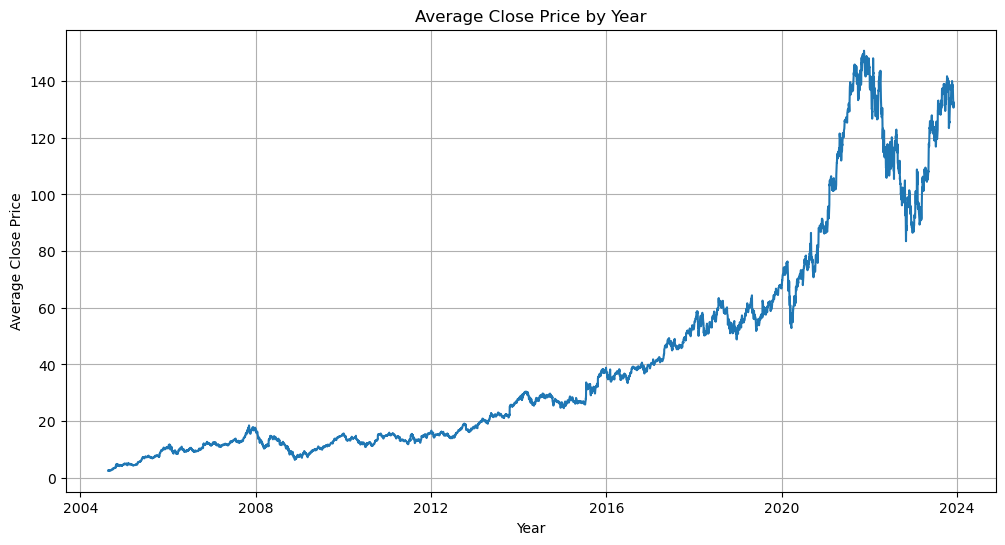

In [154]:
# year wise lineplot for close prices
# Group the data by year and calculate the mean close price for each year
yearly_data = df.groupby('Date')['Close'].mean()

# Plot the line plot
plt.figure(figsize=(12, 6))
plt.plot(yearly_data.index, yearly_data.values)
plt.xlabel('Year')
plt.ylabel('Average Close Price')
plt.title('Average Close Price by Year')
plt.grid(True)
plt.show()


# 2)histograms

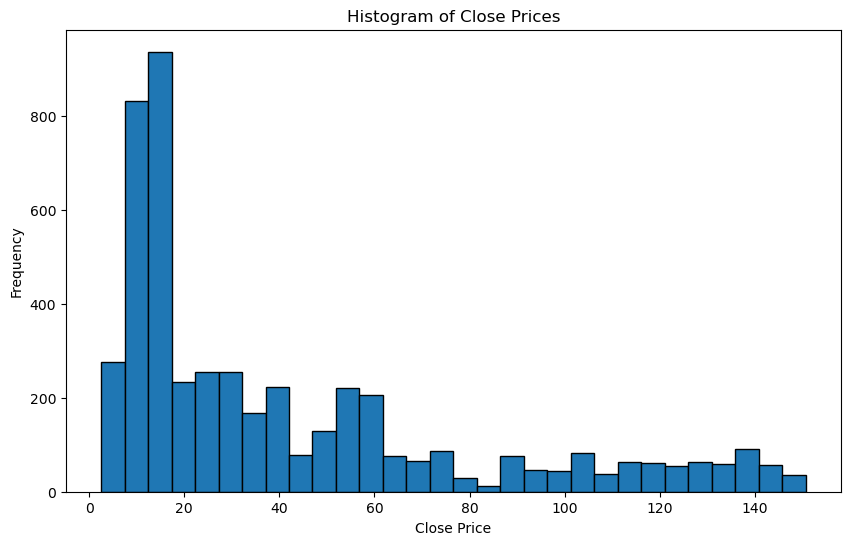

Skewness of Close Prices: 1.2735161295524005


In [156]:
 # histogram for closing price
plt.figure(figsize=(10, 6))
plt.hist(data['Close'], bins=30, edgecolor='black')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.title('Histogram of Close Prices')
plt.show()

# Calculate and print the skewness of the 'close' price column
skewness = data['Close'].skew()
print("Skewness of Close Prices:", skewness)



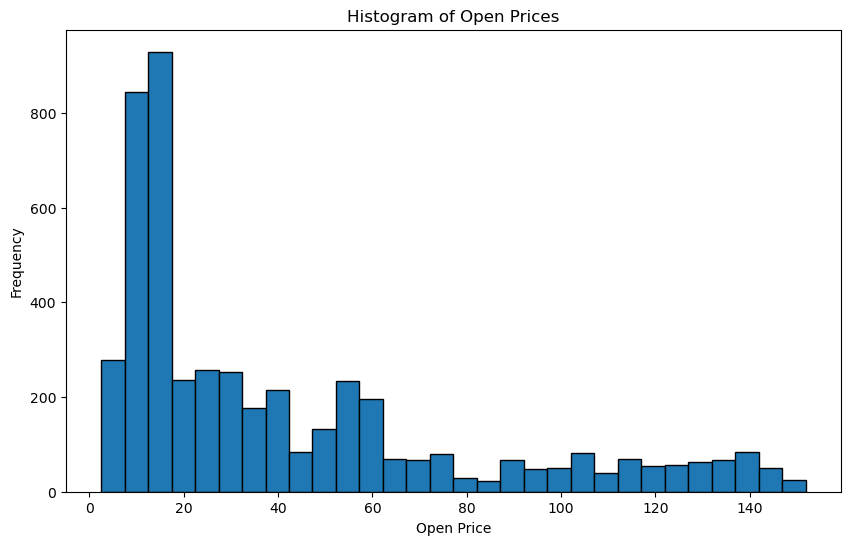

Skewness of Open Prices: 1.2753522563454645


In [157]:
# histogram for open price
plt.figure(figsize=(10, 6))
plt.hist(data['Open'], bins=30, edgecolor='black')
plt.xlabel('Open Price')
plt.ylabel('Frequency')
plt.title('Histogram of Open Prices')
plt.show()

# Calculate and print the skewness of the 'open' price column
skewness_open = data['Open'].skew()
print("Skewness of Open Prices:", skewness_open)


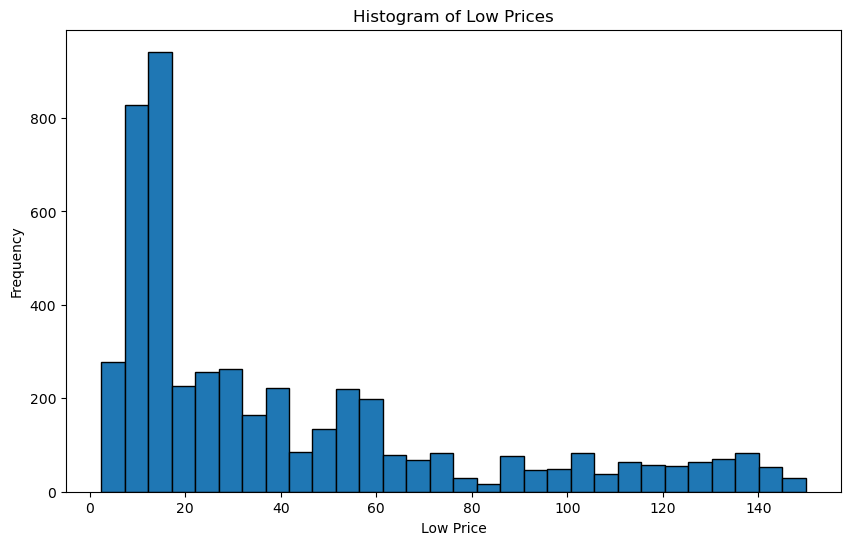

Skewness of Low Prices: 1.2741830965742955


In [158]:
# histogram for low price
plt.figure(figsize=(10, 6))
plt.hist(data['Low'], bins=30, edgecolor='black')
plt.xlabel('Low Price')
plt.ylabel('Frequency')
plt.title('Histogram of Low Prices')
plt.show()

# Calculate and print the skewness of the 'low' price column
skewness_low = data['Low'].skew()
print("Skewness of Low Prices:", skewness_low)


# insights from above histograms

# 3)Density plots

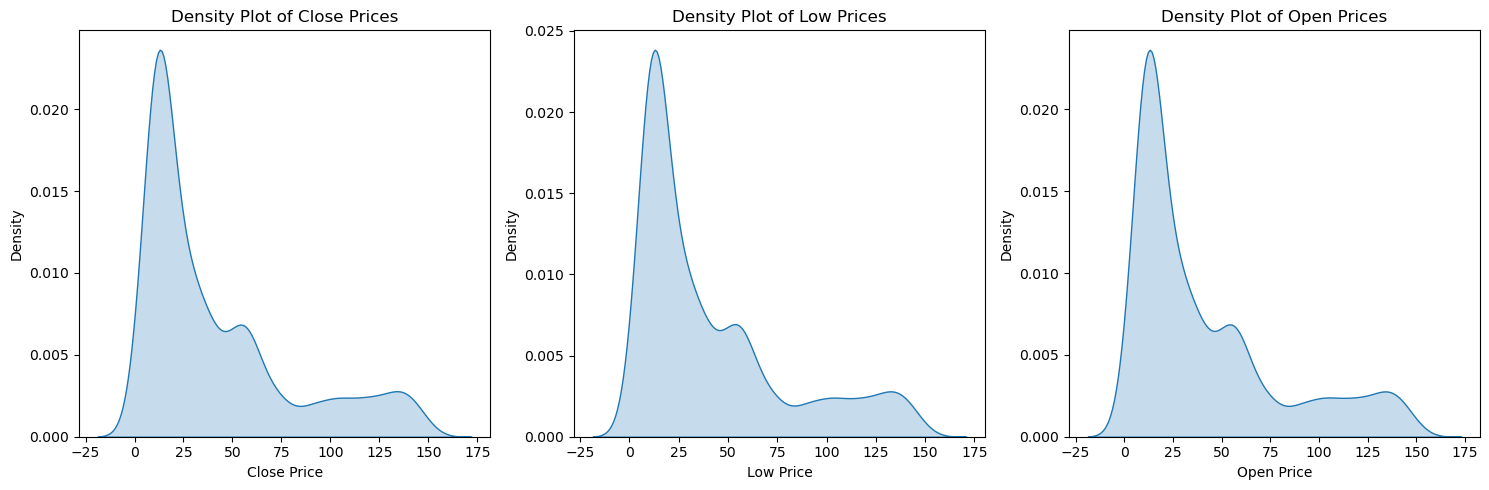

In [161]:
# Density plots for open,close and low prices

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.kdeplot(data['Close'], ax=axes[0], fill=True)
axes[0].set_title('Density Plot of Close Prices')
axes[0].set_xlabel('Close Price')
axes[0].set_ylabel('Density')

sns.kdeplot(data['Low'], ax=axes[1], fill=True)
axes[1].set_title('Density Plot of Low Prices')
axes[1].set_xlabel('Low Price')
axes[1].set_ylabel('Density')

sns.kdeplot(data['Open'], ax=axes[2], fill=True)
axes[2].set_title('Density Plot of Open Prices')
axes[2].set_xlabel('Open Price')
axes[2].set_ylabel('Density')

plt.tight_layout()
plt.show()


# 4)boxplots

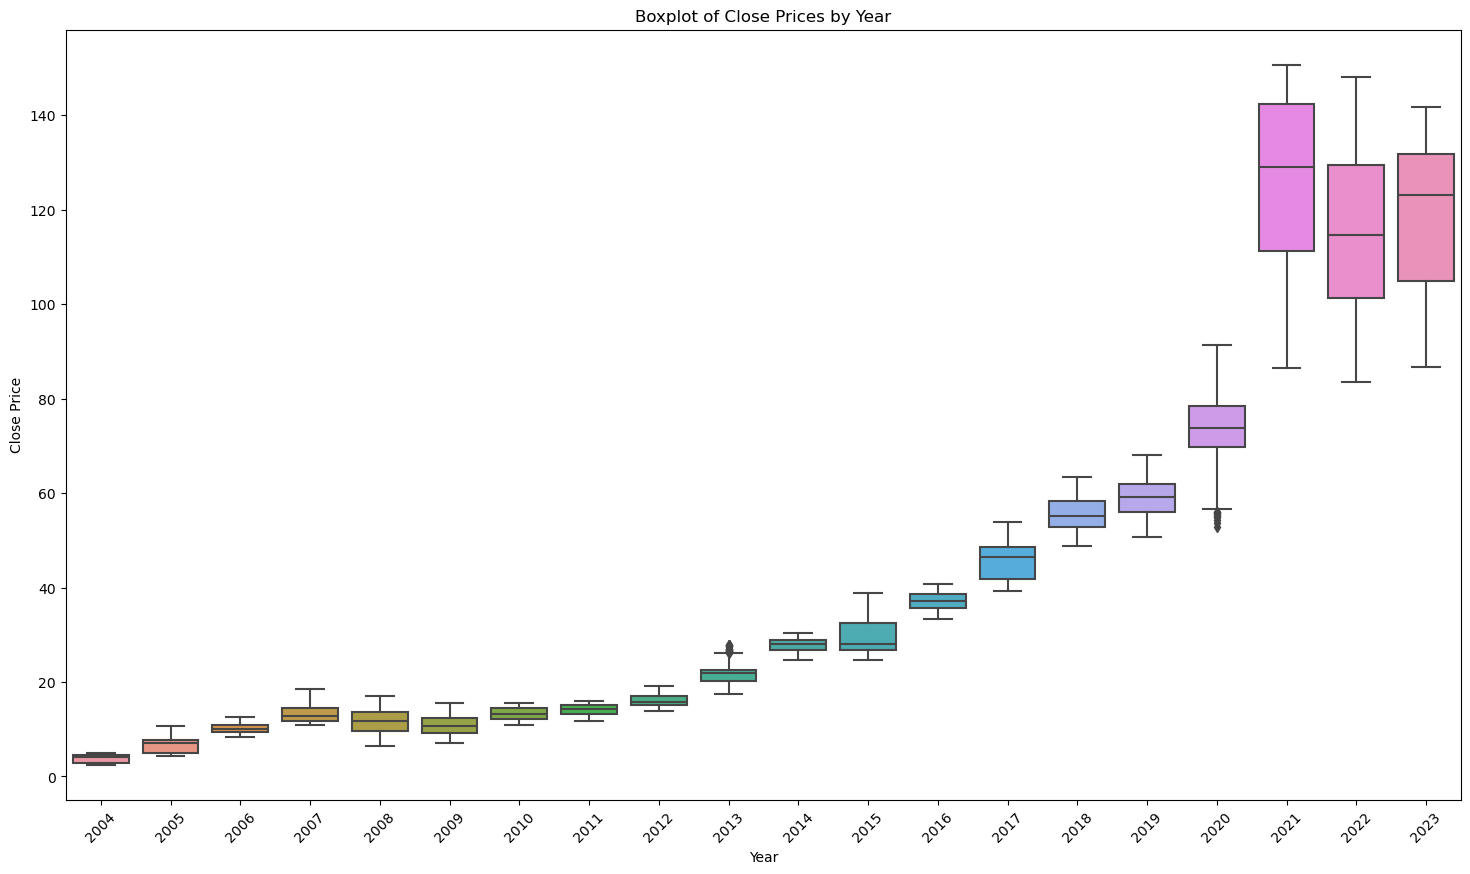

In [163]:
# year wise boxplots from 2004-2023

import seaborn as sns
df.set_index('Date', inplace=True)
# Extract the year from the index
df['year'] = df.index.year

# Create the boxplot
plt.figure(figsize=(18, 10))
sns.boxplot(x='year', y='Close', data=df)
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title('Boxplot of Close Prices by Year')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


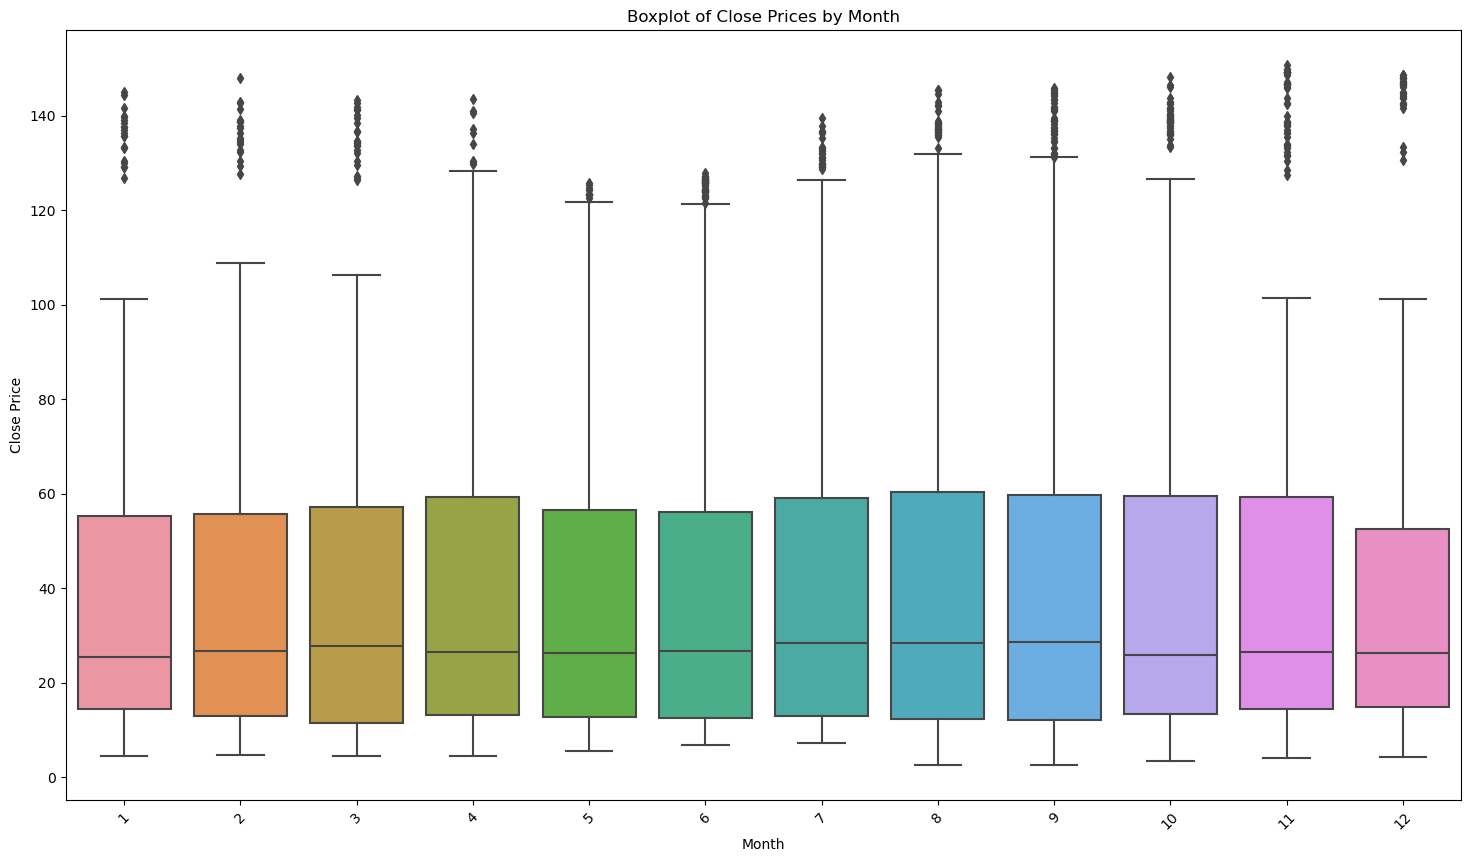

In [164]:
# month wise boxplots

df['month'] = df.index.month

# Create the boxplot
plt.figure(figsize=(18, 10))
sns.boxplot(x='month', y='Close', data=df)
plt.xlabel('Month')
plt.ylabel('Close Price')
plt.title('Boxplot of Close Prices by Month')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


# 5)Lagplots

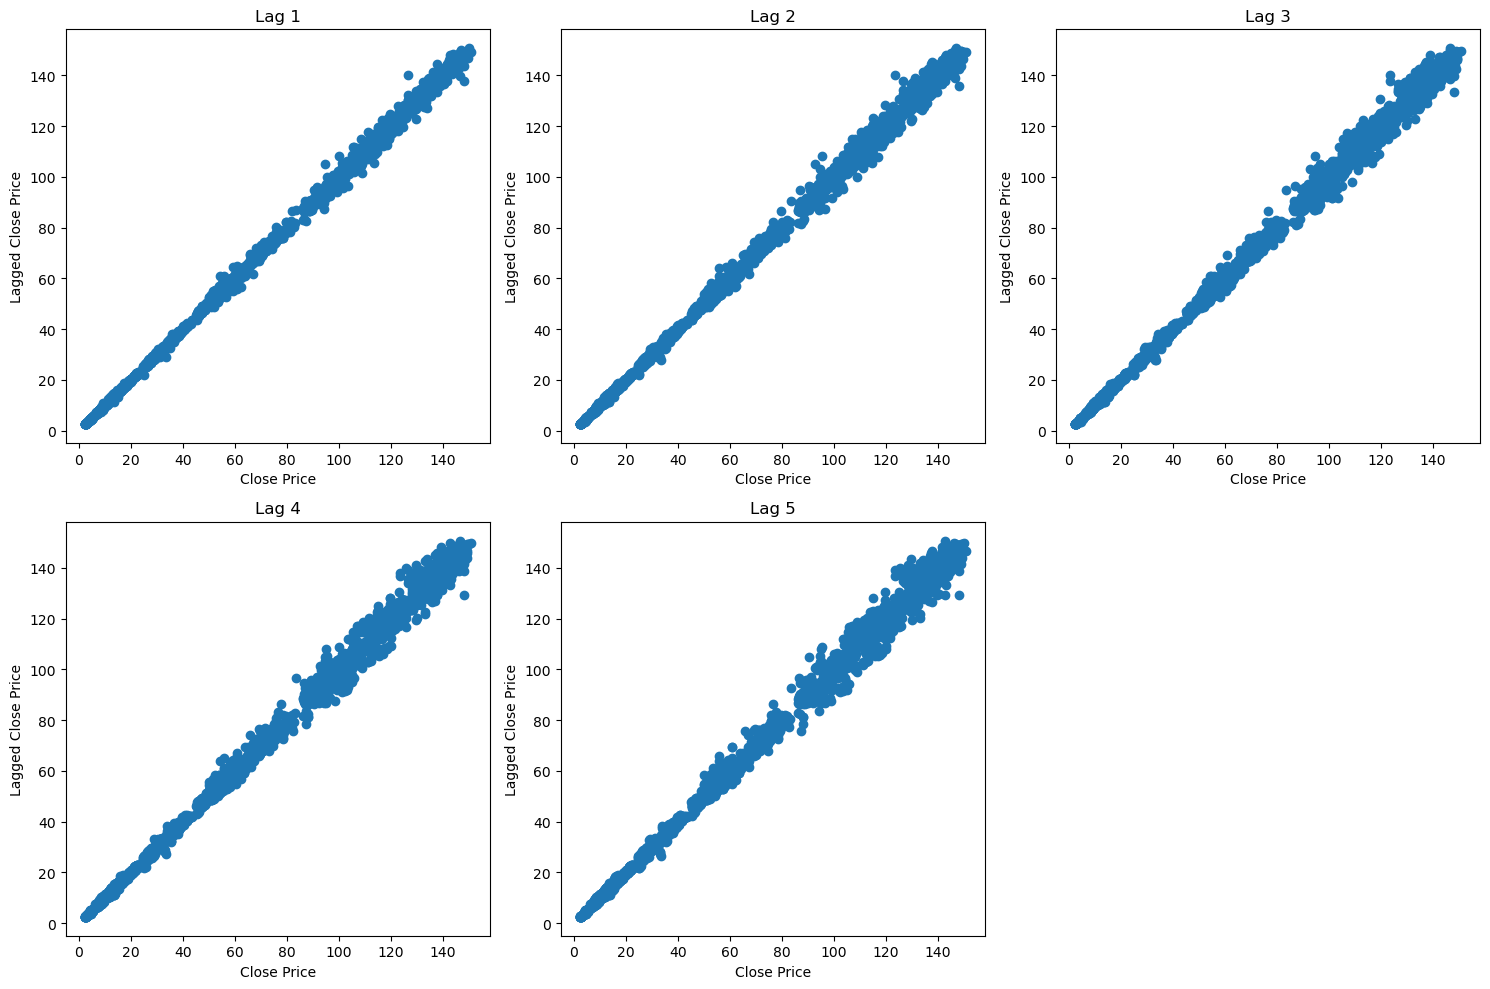

               Close  close_lag1  close_lag2  close_lag3  close_lag4  \
Close       1.000000    0.999626    0.999278    0.998936    0.998623   
close_lag1  0.999626    1.000000    0.999626    0.999278    0.998935   
close_lag2  0.999278    0.999626    1.000000    0.999626    0.999278   
close_lag3  0.998936    0.999278    0.999626    1.000000    0.999626   
close_lag4  0.998623    0.998935    0.999278    0.999626    1.000000   
close_lag5  0.998318    0.998623    0.998936    0.999277    0.999626   

            close_lag5  
Close         0.998318  
close_lag1    0.998623  
close_lag2    0.998936  
close_lag3    0.999277  
close_lag4    0.999626  
close_lag5    1.000000  


In [166]:
# making 5 lagplots for close prices data and calculating correlations

# Calculate lagged close prices
df['close_lag1'] = df['Close'].shift(1)
df['close_lag2'] = df['Close'].shift(2)
df['close_lag3'] = df['Close'].shift(3)
df['close_lag4'] = df['Close'].shift(4)
df['close_lag5'] = df['Close'].shift(5)

# Create lag plots
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.scatter(df['Close'], df['close_lag1'])
plt.title('Lag 1')
plt.xlabel('Close Price')
plt.ylabel('Lagged Close Price')

plt.subplot(2, 3, 2)
plt.scatter(df['Close'], df['close_lag2'])
plt.title('Lag 2')
plt.xlabel('Close Price')
plt.ylabel('Lagged Close Price')

plt.subplot(2, 3, 3)
plt.scatter(df['Close'], df['close_lag3'])
plt.title('Lag 3')
plt.xlabel('Close Price')
plt.ylabel('Lagged Close Price')

plt.subplot(2, 3, 4)
plt.scatter(df['Close'], df['close_lag4'])
plt.title('Lag 4')
plt.xlabel('Close Price')
plt.ylabel('Lagged Close Price')

plt.subplot(2, 3, 5)
plt.scatter(df['Close'], df['close_lag5'])
plt.title('Lag 5')
plt.xlabel('Close Price')
plt.ylabel('Lagged Close Price')

plt.tight_layout()
plt.show()

# Calculate correlations
correlations = df[['Close', 'close_lag1', 'close_lag2', 'close_lag3', 'close_lag4', 'close_lag5']].corr()
print(correlations)


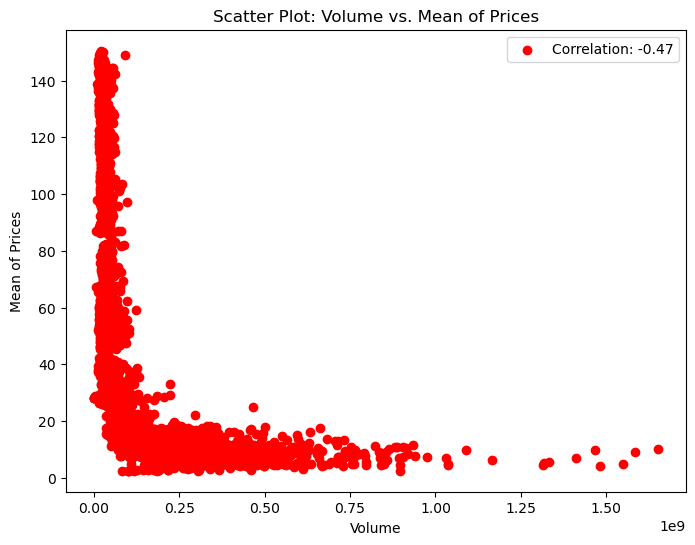

In [167]:
correlation = data['Volume'].corr(data['mean_of_prices'])

plt.figure(figsize=(8, 6))
plt.scatter(data['Volume'], data['mean_of_prices'], color='r', label=f'Correlation: {correlation:.2f}')
plt.xlabel('Volume')
plt.ylabel('Mean of Prices')
plt.title('Scatter Plot: Volume vs. Mean of Prices')
plt.legend()
plt.grid(False)

plt.show()

In [168]:
correlation

-0.4719323132446536

In [169]:
data = data.drop('mean_of_prices', axis=1)
data.head()



,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [170]:
data.fillna(0, inplace=True)
data['daily_return']= data['Close'].pct_change()
data = data.dropna()
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume,daily_return
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,0.079430
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,0.010064
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,-0.041408
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,0.010775
5,2004-08-26,2.613952,2.688672,2.606729,2.687676,2.687676,142572401,0.018019


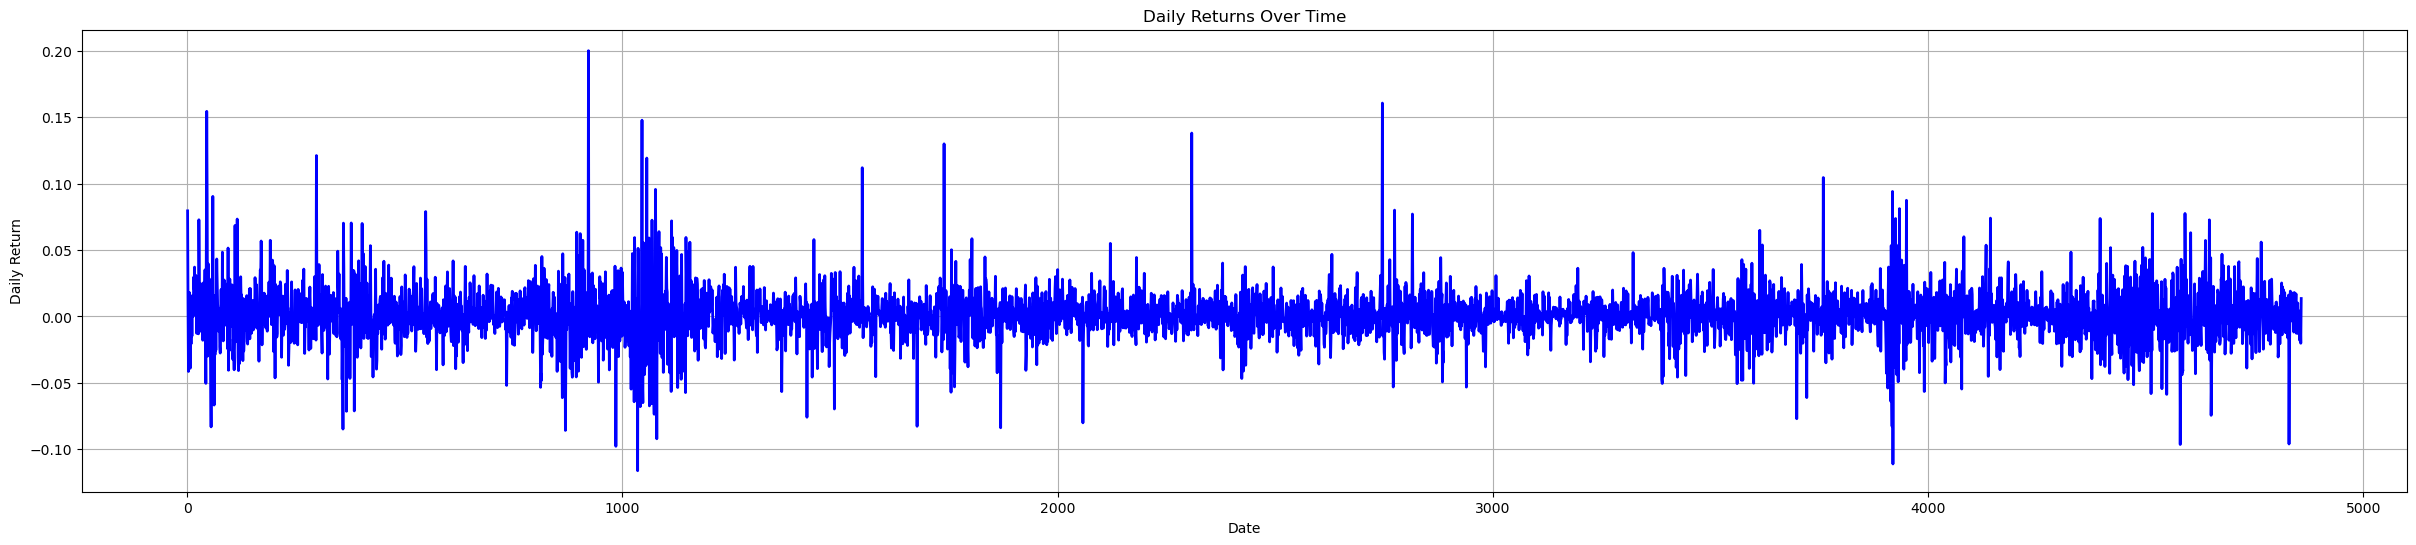

In [171]:
plt.figure(figsize=(30,6))
plt.plot(data.index, data['daily_return'], color='blue', linewidth=2)
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()


In [172]:
risk = data["daily_return"].std()

In [173]:
risk


0.019376844077809884

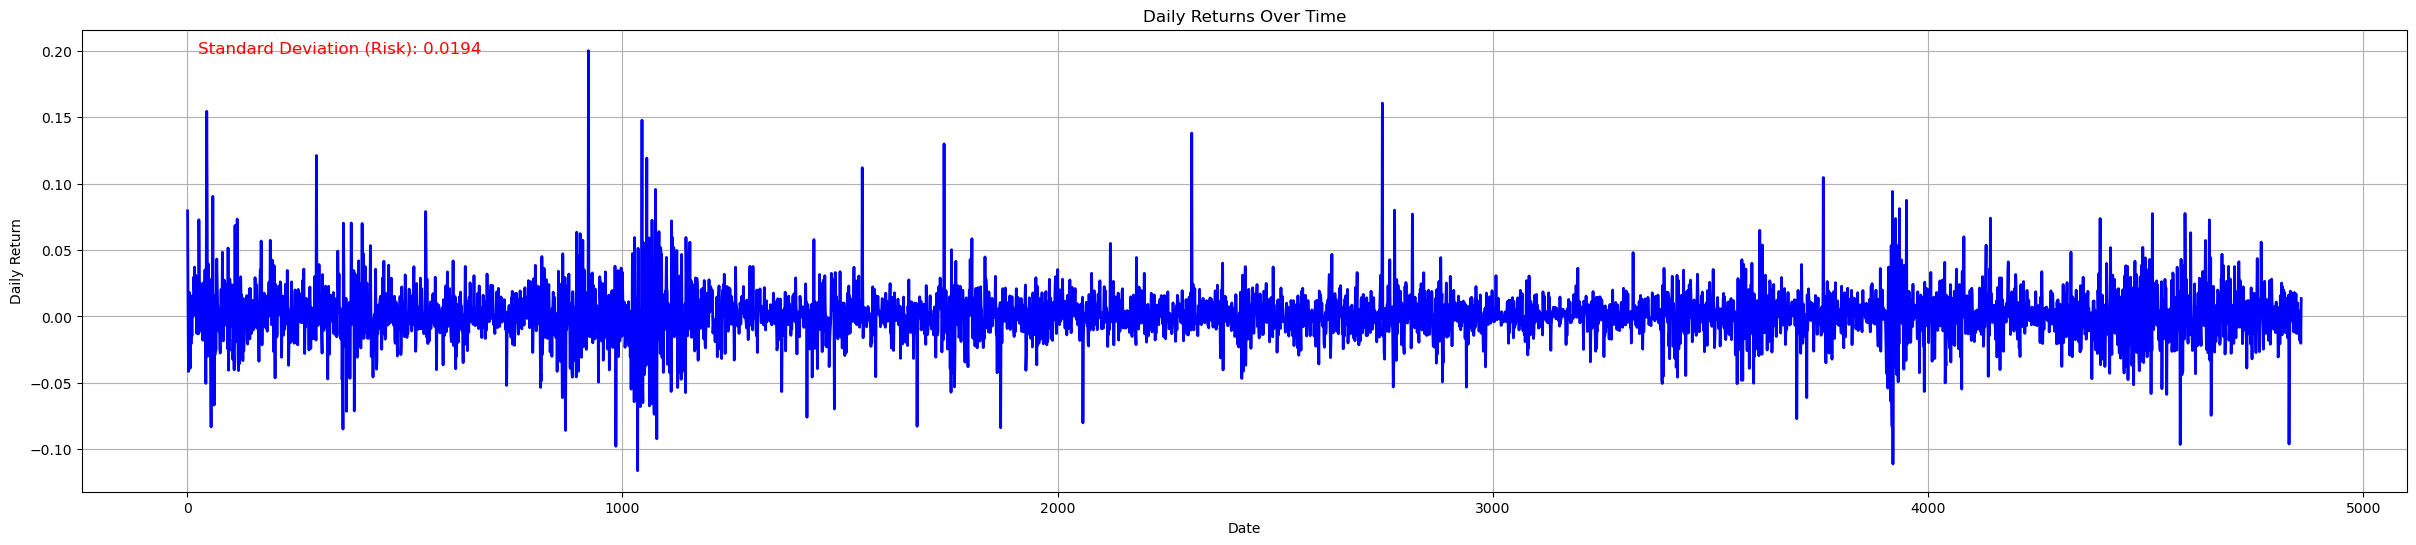

In [174]:
plt.figure(figsize=(30, 6))
plt.plot(data.index, data['daily_return'], color= "blue", linewidth=2)
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)

plt.annotate(f'Standard Deviation (Risk): {risk:.4f}',
             xy=(0.05, 0.95), xycoords='axes fraction',
             fontsize=12, color='red')

plt.show()


In [175]:
mean = data['daily_return'].mean()
mean

0.0010040136372466769

# Explanation:

The mean return of 0.001 informs the user that the investment has a small positive daily return: which represents a relatively stable performance over time. The risk value of 0.019 represents the standard deviation of daily returns. It informs the user that the stock's daily returns show relatively moderate volatility.

In [178]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [179]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'daily_return'],
      dtype='object')

In [180]:
data.set_index('Date', inplace=True)

In [181]:
data.index

DatetimeIndex(['2004-08-20', '2004-08-23', '2004-08-24', '2004-08-25',
               '2004-08-26', '2004-08-27', '2004-08-30', '2004-08-31',
               '2004-09-01', '2004-09-02',
               ...
               '2023-11-21', '2023-11-22', '2023-11-24', '2023-11-27',
               '2023-11-28', '2023-11-29', '2023-11-30', '2023-12-01',
               '2023-12-04', '2023-12-05'],
              dtype='datetime64[ns]', name='Date', length=4857, freq=None)

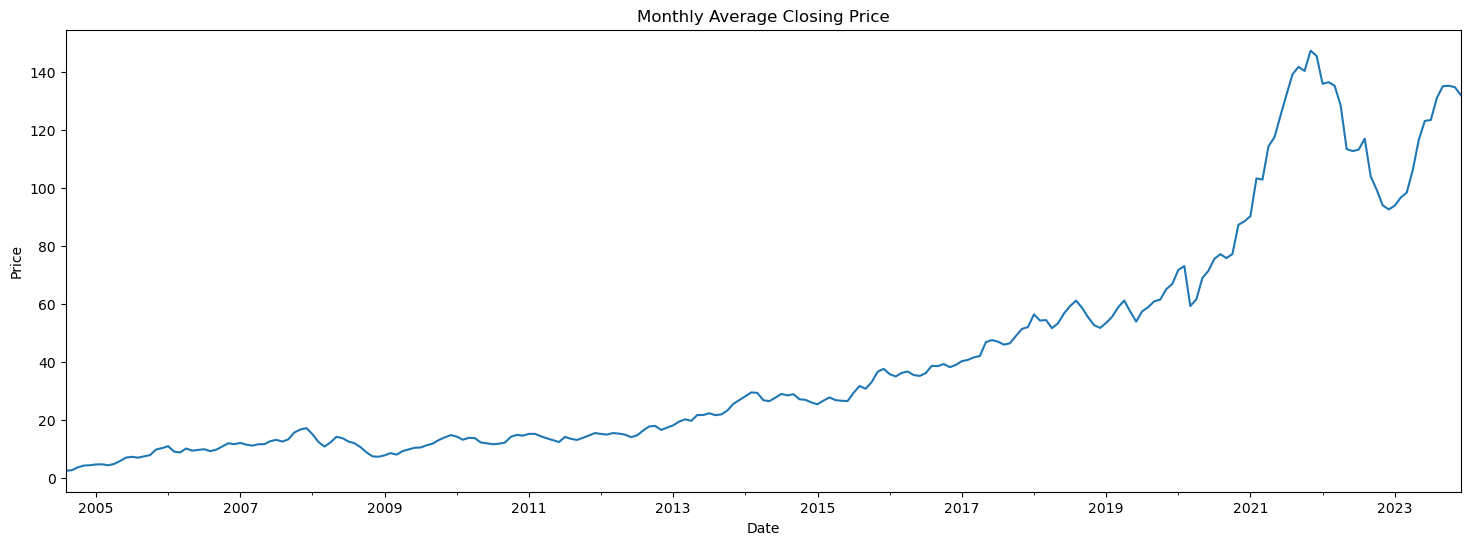

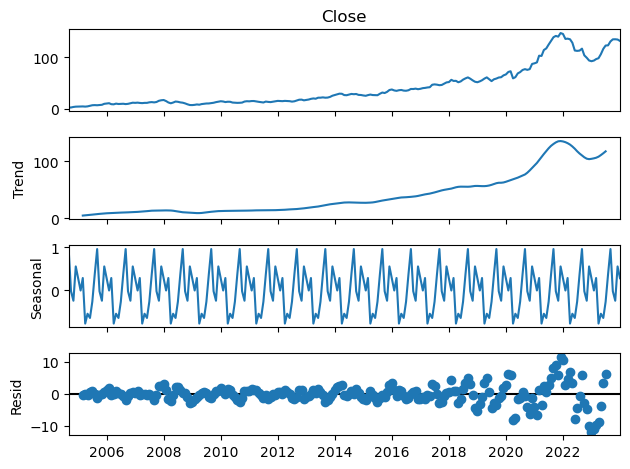

In [182]:
monthly_data = data.resample('M').mean()
monthly_data['Close'].plot(figsize=(18,6))
plt.title('Monthly Average Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(False)
plt.show()
result = seasonal_decompose(monthly_data['Close'], model='additive')
result.plot()
plt.grid(False)
plt.show()

In [183]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,daily_return
Date,,,,,,,
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,0.079430
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,0.010064
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,-0.041408
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,0.010775
2004-08-26,2.613952,2.688672,2.606729,2.687676,2.687676,142572401,0.018019


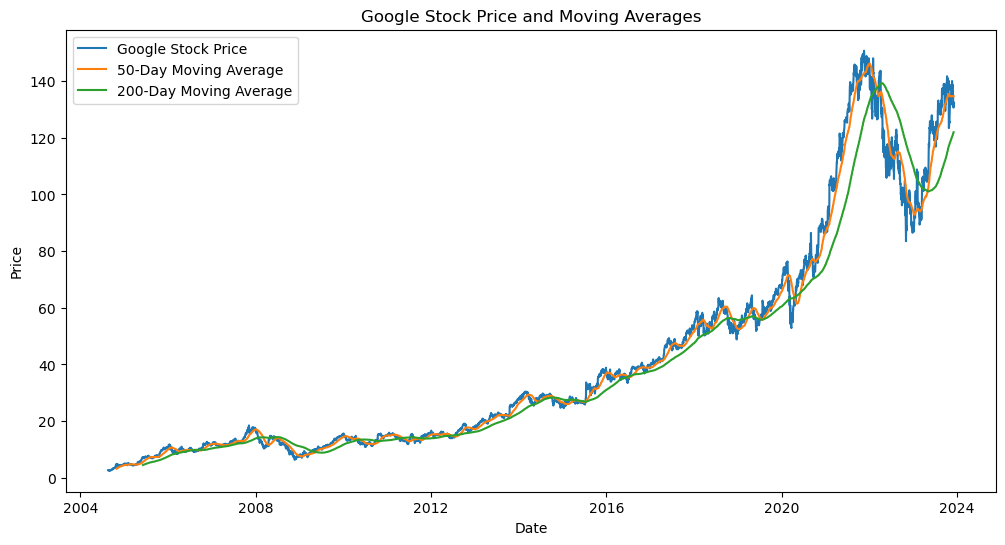

In [184]:
data['50_Day_MA'] = data['Close'].rolling(window=50).mean()
data['200_Day_MA'] = data['Close'].rolling(window=200).mean()
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Google Stock Price')
plt.plot(data.index, data['50_Day_MA'], label='50-Day Moving Average')
plt.plot(data.index, data['200_Day_MA'], label='200-Day Moving Average')
plt.title('Google Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(False)
plt.legend()
plt.show()


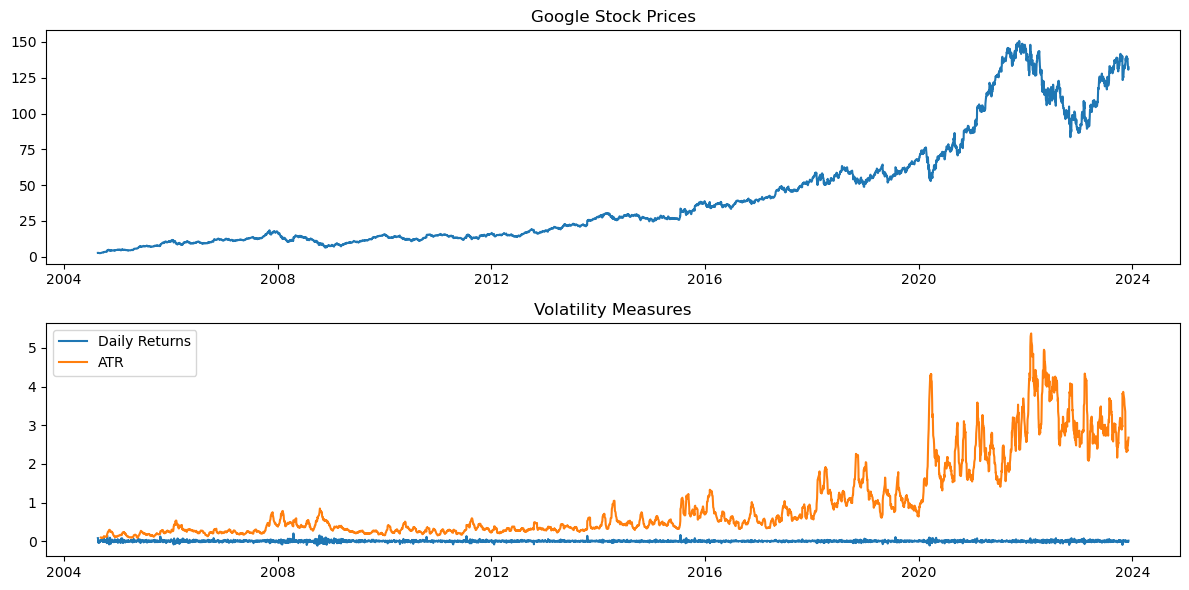

Standard Deviation (Volatility): 0.019376844077809884


In [185]:
volatility_std = data["daily_return"].std()

data["High_Low_Diff"] = data["High"] - data["Low"]
data["High_Previousclose_Diff"] = np.abs(data["High"] - data["Close"].shift(1))
data["Low_Previousclose_Diff"] = np.abs(data["Low"] - data["Close"].shift(1))
data["ATR"] = data[["High_Low_Diff", "High_Previousclose_Diff", "Low_Previousclose_Diff"]].max(axis=1).rolling(window=14).mean()

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(data["Close"])
plt.title("Google Stock Prices")

plt.subplot(2, 1, 2)
plt.plot(data["daily_return"], label="Daily Returns")
plt.plot(data["ATR"], label="ATR")
plt.legend()
plt.title("Volatility Measures")

plt.tight_layout()
plt.show()

print("Standard Deviation (Volatility):", volatility_std)


In [187]:
# Calculate Moving Averages (MA)
data["MA_50"] = data["Close"].rolling(window=50).mean()
data["MA_200"] = data["Close"].rolling(window=200).mean()

In [188]:
data["MA_50"]

Date
2004-08-20         NaN
2004-08-23         NaN
2004-08-24         NaN
2004-08-25         NaN
2004-08-26         NaN
                ...   
2023-11-29    134.6274
2023-11-30    134.6140
2023-12-01    134.6532
2023-12-04    134.6408
2023-12-05    134.6452
Name: MA_50, Length: 4857, dtype: float64

In [189]:
data["MA_200"]

Date
2004-08-20           NaN
2004-08-23           NaN
2004-08-24           NaN
2004-08-25           NaN
2004-08-26           NaN
                 ...    
2023-11-29    121.191475
2023-11-30    121.386325
2023-12-01    121.567425
2023-12-04    121.741675
2023-12-05    121.930675
Name: MA_200, Length: 4857, dtype: float64

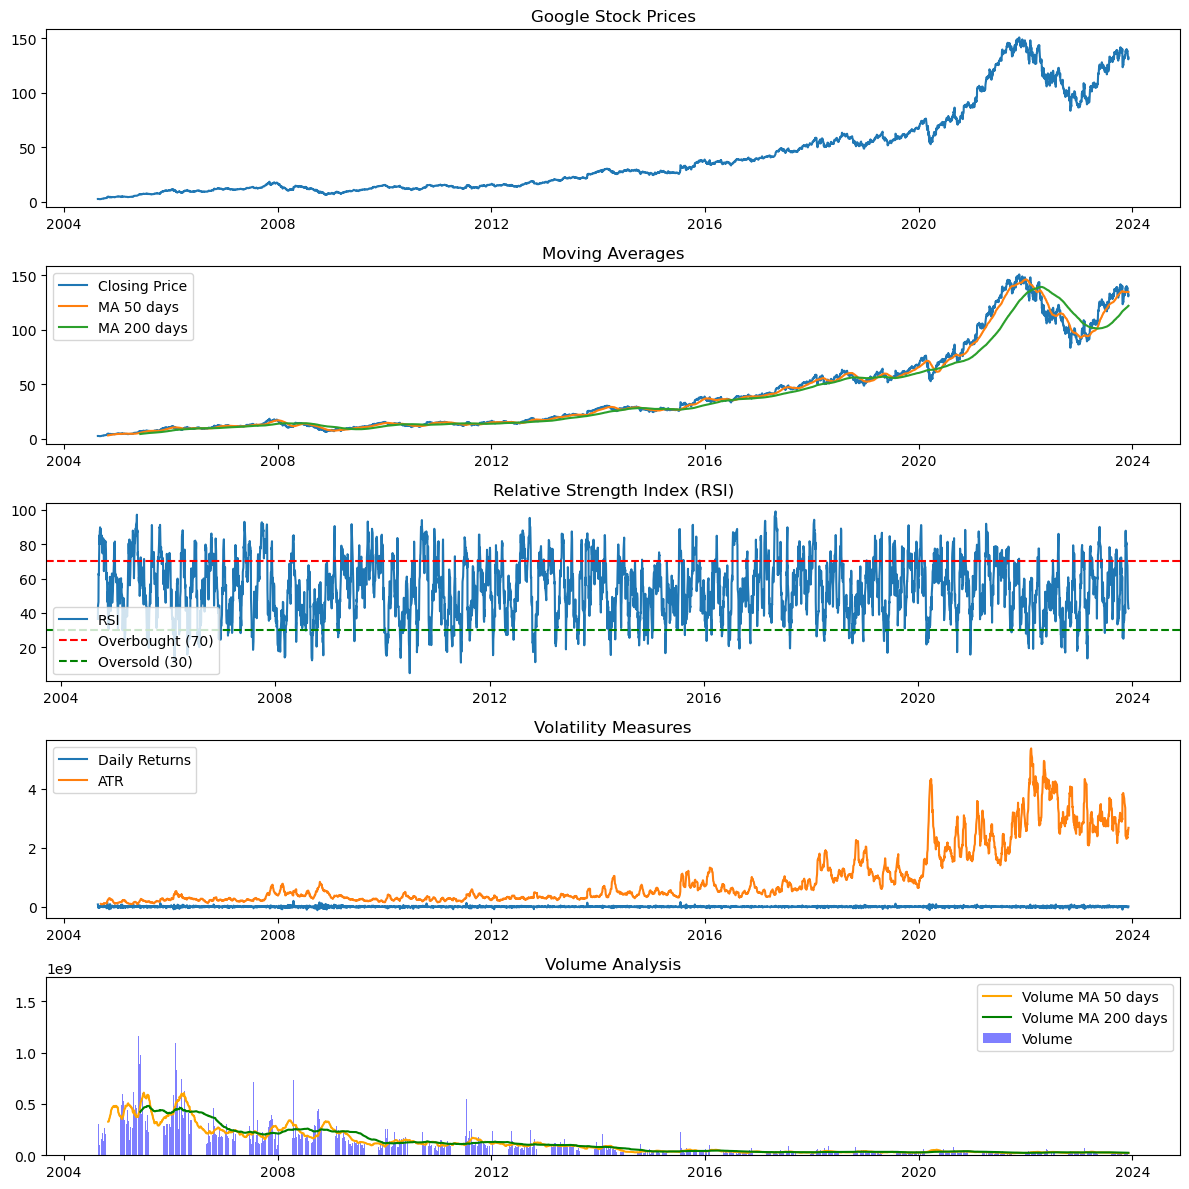

Standard Deviation (Volatility): 0.019376844077809884


In [190]:
# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data["Close"].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data["RSI"] = calculate_rsi(data)

# Calculate Daily Returns and ATR
data["High_Low_Diff"] = data["High"] - data["Low"]
data["High_Previousclose_Diff"] = np.abs(data["High"] - data["Close"].shift(1))
data["Low_Previousclose_Diff"] = np.abs(data["Low"] - data["Close"].shift(1))
data["ATR"] = data[["High_Low_Diff", "High_Previousclose_Diff", "Low_Previousclose_Diff"]].max(axis=1).rolling(window=14).mean()

# Volume Analysis
data["Volume_MA_50"] = data["Volume"].rolling(window=50).mean()
data["Volume_MA_200"] = data["Volume"].rolling(window=200).mean()

# Plotting
plt.figure(figsize=(12, 12))

#Plot Google stock
plt.subplot(5, 1, 1)
plt.plot(data["Close"])
plt.title("Google Stock Prices")

# Plot Stock Prices and Moving Averages
plt.subplot(5, 1, 2)
plt.plot(data["Close"], label="Closing Price")
plt.plot(data["MA_50"], label="MA 50 days")
plt.plot(data["MA_200"], label="MA 200 days")
plt.legend()
plt.title("Moving Averages")

# Plot RSI
plt.subplot(5, 1, 3)
plt.plot(data["RSI"], label="RSI")
plt.axhline(y=70, color='r', linestyle='--', label="Overbought (70)")
plt.axhline(y=30, color='g', linestyle='--', label="Oversold (30)")
plt.legend()
plt.title("Relative Strength Index (RSI)")

# Plot Daily Returns and ATR
plt.subplot(5, 1, 4)
plt.plot(data["daily_return"], label="Daily Returns")
plt.plot(data["ATR"], label="ATR")
plt.legend()
plt.title("Volatility Measures")

# Plot Volume and Volume Moving Averages
plt.subplot(5, 1, 5)
plt.bar(data.index, data["Volume"], label="Volume", color='blue', alpha=0.5)
plt.plot(data["Volume_MA_50"], label="Volume MA 50 days", color='orange')
plt.plot(data["Volume_MA_200"], label="Volume MA 200 days", color='green')
plt.legend()
plt.title("Volume Analysis")

plt.tight_layout()
plt.show()


print("Standard Deviation (Volatility):", data["daily_return"].std())

In [191]:
# Use the "Close" column for modeling
close_prices = data['Close'].values

In [192]:
# Normalize the close prices
scaler = MinMaxScaler(feature_range=(0, 1))
close_prices_scaled = scaler.fit_transform(close_prices.reshape(-1, 1))

In [193]:
# Function to create sequences of 50 days of data
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps, 0])  # 50 days of input
        y.append(data[i + time_steps, 0])   # next day's price as label
    return np.array(X), np.array(y)

In [194]:
# Create sequences with 50 days as input
time_steps = 50
X, y = create_sequences(close_prices_scaled, time_steps)

In [195]:
# Reshape X to be suitable for LSTM: (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

In [196]:
# Split data into training and testing sets (80-20 split)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [197]:
X.shape, X_train.shape, X_test.shape

((4807, 50, 1), (3845, 50, 1), (962, 50, 1))

In [198]:
# Build the LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the LSTM Model
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0063
Epoch 2/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.9070e-05
Epoch 3/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 4.8938e-05
Epoch 4/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 4.4507e-05
Epoch 5/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 5.4675e-05
Epoch 6/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 4.0956e-05
Epoch 7/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.3017e-05
Epoch 8/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 4.3800e-05
Epoch 9/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 3.8799e-05
Epoch 10/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 3.7830e-05
Epoch 11/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 3.8365e-05
Epoch 12/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 4.7273e-05
Epoch 13/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 3.8497e-05
Epoch 14/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 3.

In [ ]:
model.summary()

In [ ]:
#Make Predictions
predictions = model.predict(X_test)
# Reverse scaling to get the original price values
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# visualize
import math
from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(y_test_original, predictions))
print(f"Root Mean Square Error (RMSE): {rmse}")

# Plot the results
plt.figure(figsize=(14, 6))
plt.plot(y_test_original, color='blue', label='Actual Prices')
plt.plot(predictions, color='red', label='Predicted Prices')
plt.title('LSTM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
import pickle

# Save the trained LSTM model
with open('lstm_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the scaler (used for scaling and inverse transforming data)
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [ ]:
model.save('Stock Predictions Model.keras')

In [ ]:

# ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'Close' is the column to forecast
df['Date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
df.set_index('Date', inplace=True)
series = df['Close']

# Train-Test Split
train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]

# Fit ARIMA Model
arima_model = ARIMA(train, order=(5, 1, 0))
arima_result = arima_model.fit()

# Forecast
arima_forecast = arima_result.forecast(steps=len(test))

rmse = np.sqrt(mean_squared_error(test, arima_forecast))
print(f"RMSE: {rmse}")

plt.figure(figsize=(10, 6))
plt.plot(series.index, series, label='Actual')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='red')
plt.legend()
plt.title("ARIMA Forecast")
plt.show()


In [ ]:
# SARIMA Model
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA Model
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit(disp=False)

# Forecast
sarima_forecast = sarima_result.forecast(steps=len(test))

sarima_rmse = np.sqrt(mean_squared_error(test, sarima_forecast))
print(f"SARIMA RMSE: {sarima_rmse}")

plt.figure(figsize=(10, 6))
plt.plot(series.index, series, label='Actual')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='green')
plt.legend()
plt.title("SARIMA Forecast")
plt.show()


In [ ]:

# Prophet Model
from prophet import Prophet

# Prepare data for Prophet
prophet_df = series.reset_index()
prophet_df.columns = ['ds', 'y']

# Fit Prophet Model
prophet_model = Prophet()
prophet_model.fit(prophet_df[:-len(test)])

# Forecast
future = prophet_model.make_future_dataframe(periods=len(test))
forecast = prophet_model.predict(future)
prophet_forecast = forecast[-len(test):]['yhat'].values
prophet_rmse = np.sqrt(mean_squared_error(test.values, prophet_forecast))
print(f"Prophet RMSE: {prophet_rmse}")

# Plot Forecast
fig = prophet_model.plot(forecast)
plt.title("Prophet Forecast")
plt.show()
